## Dependecies


In [1]:
import sys
from pathlib import Path
from torchvision import datasets

## Utils


In [2]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

data_root = project_root / "data"
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook

setup_notebook()

Notebook setup completed. Project root added to sys.path: D:\Unlearning


In [3]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed

set_seed()

# Prepare Dataloaders
from methods.naive.naive_utils import init_dataloaders

# Train loop
from utils.train_test_metrics import train_model

# Plot losses
from utils.train_test_metrics import plot_training_history

# Test function
from utils.train_test_metrics import test_model

# Merics
from utils.train_test_metrics import show_metrics

# Init model
from models.resnet50 import init_model_resnet50

Device used: cuda


## Parameters (arbitrary chosen)


In [4]:
BATCH_SIZE = 256
LEARNING_RATE = 5e-5
EPOCHS = 5

# Simple base training


## Init model


In [6]:
model, model_name, criterion, optimizer, transform = init_model_resnet50(
    learning_rate=LEARNING_RATE, fc_output=10
)

Init model...
Done initializing model.
Model ID: 1670026563200, Optimizer ID: 1668900929200, Criterion ID: 1668900929344


## Init dataloaders


In [11]:
result_path = project_root / "results" / "cifar10" / "naive"

In [8]:
train_dataset = datasets.CIFAR10(
    root=data_root, train=True, transform=transform, download=True
)
test_dataset = datasets.CIFAR10(
    root=data_root, train=False, transform=transform, download=True
)
data_split_path = result_path / "cifar10_data_splits.json"

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(train_dataset, test_dataset),
    val_ratio=0.2,
    batch_size=BATCH_SIZE,
    info_file_path=data_split_path,
)

Prepare DataLoaders...


KeyboardInterrupt: 

## Call train


In [ ]:
import time

start_time = time.perf_counter()
train_model(
    model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS
)
end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

## Plot history losses


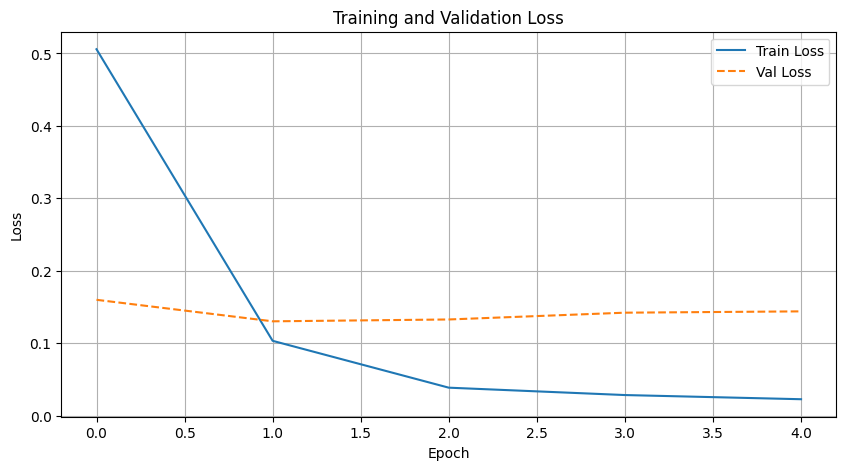

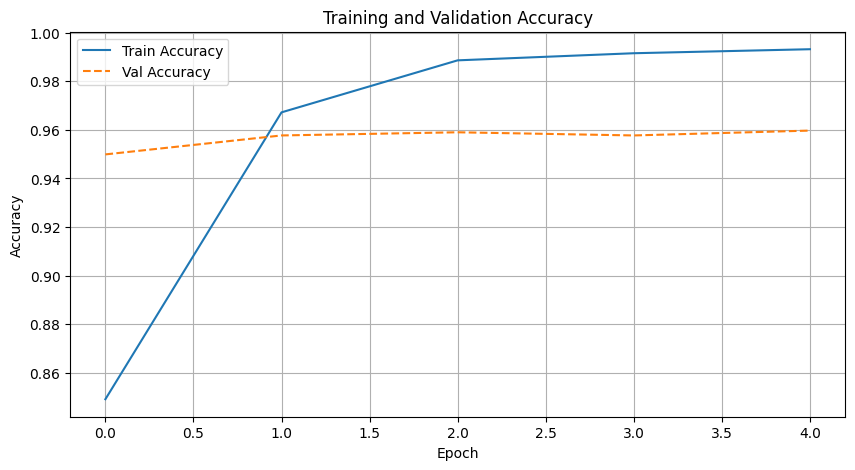

In [ ]:
history_path = result_path / f"{model_name}_history.json"
plot_training_history(history_path)

## Call test


In [ ]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

## Show metrics


In [ ]:
predictions_path = f"{model_name}_predictions.json"
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

## Utils naive


In [ ]:
# Select samples to unlearn (10% random)
from utils.utils import select_samples_to_unlearn

# Update data splits
from methods.naive.naive_utils import update_splits_after_unlearning

# Recreate Dataloaders from json files
from methods.naive.naive_utils import recreate_dataloaders

# Naive unlearning


### Init new model


In [ ]:
data_splits_file = "cifar10_data_splits.json"
unlearn_samples_file = "cifar10_samples_to_unlearn_30per.json"
updated_data_splits_path = "updated_cifar10_data_splits.json"

In [ ]:
model, model_name, criterion, optimizer, transform = init_model_resnet50(
    learning_rate=LEARNING_RATE, fc_output=10
)
model_name = "naive_unlearning_" + model_name
import torch.nn as nn

model = nn.DataParallel(model, device_ids=[0, 1])

### Init data


In [ ]:
train_dataset = datasets.CIFAR10(
    root=data_root, train=True, transform=transform, download=True
)
test_dataset = datasets.CIFAR10(
    root=data_root, train=False, transform=transform, download=True
)

## Select samples to unlearn


In [ ]:
# ONLY ONCE
select_samples_to_unlearn(data_splits_file, unlearn_samples_file, unlearn_ratio=0.3)

## Update data splits -> delete samples


In [ ]:
update_splits_after_unlearning(
    data_splits_file, unlearn_samples_file, updated_data_splits_path
)

## Recreate DataLoaders from json files


In [ ]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset),
    batch_size=BATCH_SIZE,
)

## Re-train


In [ ]:
import time

start_time = time.perf_counter()
train_model(
    model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS
)
end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

## Plot history losses


In [ ]:
history_path = f"{model_name}_history.json"
plot_training_history(history_path)

## Re-test


In [ ]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

## Show metrics


In [ ]:
predictions_path = f"{model_name}_predictions.json"
show_metrics(predictions_path, classes, model_name)